In [1]:
import sys
sys.path.append('../paleo_scrape/')
from paleo_scrape import make_df

import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
# get paleoclimatological data from North America for the Early Holocene (11.7-8.2 ky B.P.;Walker et al. 2012) 

df = make_df()

1. enter continent: North America
2. set earliest year?: (True or False) True
2.5 enter earliest year needed: 11700
3. set latest year?: (True or False) True
3.5 enter latest year needed: 8200
4. getting data, please wait

total number of studies = 305 

5. set start of index? (True or False) False
6. set end of index? (True or False) False
download starting... 

status: 0.328947368421% 1 out of 304
status: 0.657894736842% 2 out of 304
status: 0.986842105263% 3 out of 304
status: 1.31578947368% 4 out of 304
status: 1.64473684211% 5 out of 304
status: 1.97368421053% 6 out of 304
status: 2.30263157895% 7 out of 304
status: 2.63157894737% 8 out of 304
status: 2.96052631579% 9 out of 304
status: 3.28947368421% 10 out of 304
status: 3.61842105263% 11 out of 304
status: 3.94736842105% 12 out of 304
status: 4.27631578947% 13 out of 304
status: 4.60526315789% 14 out of 304
status: 4.93421052632% 15 out of 304
status: 5.26315789474% 16 out of 304
status: 5.59210526316% 17 out of 304
status: 5.9

In [3]:
df.head(2)

,dataType,date,earliest_BP,lat,lon,maxElevation,most_recent_BP,online_link,study name,xmlId
0,PALEOLIMNOLOGY,2010-11-17,200000,70.55,-68.95,195,907,https://www.ncdc.noaa.gov/paleo/study/9896,"200KYr Midge Temperature, Diatom pH, and C/N D...",8788
1,PALEOLIMNOLOGY,2009-12-11,9860,45.86694,-95.80361,None,-32,https://www.ncdc.noaa.gov/paleo/study/5473,A High-Resolution Record of Climatic Change in...,652


In [4]:
df.dataType.value_counts()

PLANT MACROFOSSILS         80
ICE CORES                  76
PALEOLIMNOLOGY             76
FIRE HISTORY               34
SPELEOTHEMS                20
OTHER COLLECTIONS           7
INSECT                      3
PALEOCEANOGRAPHY            2
CLIMATE RECONSTRUCTIONS     2
LAKE LEVELS                 2
POLLEN                      1
LOESS                       1
Name: dataType, dtype: int64

In [5]:
# identify outliers -> those with large range of longitude and latitude values
outliers = np.where([str(i).startswith('[') for i in df.lat])
df.iloc[outliers]

,dataType,date,earliest_BP,lat,lon,maxElevation,most_recent_BP,online_link,study name,xmlId
51,PALEOCEANOGRAPHY,2014-04-18,9660,"[-98, -98]","[31, -89]",None,150,https://www.ncdc.noaa.gov/paleo/study/16361,Central US Gulf Coast Holocene Relative Sea-Le...,14088
79,CLIMATE RECONSTRUCTIONS,1994-06-21,18000,"[-100, -100]","[50, -50]",None,0,https://www.ncdc.noaa.gov/paleo/study/16442,"Eastern North America 18,000 Year Vegetation M...",14168
134,OTHER COLLECTIONS,2016-11-10,305000,"[-60, -60]","[82, -20]",None,331,https://www.ncdc.noaa.gov/paleo/study/20776,Greenland Cosmogenic Exposure Ages Database,18613
135,ICE CORES,2016-12-21,11000,"[-60, -60]","[82, -20]",None,0,https://www.ncdc.noaa.gov/paleo/study/21092,Greenland Ice Core (GICC05) and Radiocarbon (I...,19032
137,PALEOCEANOGRAPHY,2013-11-27,145100,"[-55, -55]","[68, -45]",-3460,6700,https://www.ncdc.noaa.gov/paleo/study/15614,"Greenland Stream Sediments, Eirik Drift Marine...",13417
161,LOESS,2001-06-18,34000,"[-102, -102]","[48, -84]",None,10000,https://www.ncdc.noaa.gov/paleo/study/5603,Kohfeld and Harrison 2001 Mid-continental USA ...,2678
250,OTHER COLLECTIONS,2010-09-16,10800,"[71.45, 71.45]","[70.08, 70.29]",40,9800,https://www.ncdc.noaa.gov/paleo/study/9637,Sam Ford Fjord early Holocene Laurentide Glaci...,8625
282,INSECT,2006-03-27,10000,"[-130, -130]","[60, -120]",None,0,https://www.ncdc.noaa.gov/paleo/study/5797,Walker et al. 2003 Canada Chironomid Data,2948


In [6]:
# drop outliers and reset the index
working_df = df.drop(outliers[0], axis=0).reset_index()
working_df = working_df.drop('index', axis=1)
working_df.columns = ['type', 'date', 'earliest_BP', 'latitude', 'longitude', 'Elevation', 'most_recent_BP', 'online_link', 'study desc', 'xmlId']
working_df.longitude = pd.to_numeric(working_df.longitude)
working_df.latitude = pd.to_numeric(working_df.latitude)
working_df.Elevation = pd.to_numeric(working_df.Elevation)
working_df.tail(3)

,type,date,earliest_BP,latitude,longitude,Elevation,most_recent_BP,online_link,study desc,xmlId
293,PLANT MACROFOSSILS,2001-08-07,12820,46.50,-92.56667,358.0,11083,https://www.ncdc.noaa.gov/paleo/study/7900,"Wright, H.E., Blackhoof Site (BLKHOOF) North A...",3097
294,PALEOLIMNOLOGY,2014-01-24,17900,43.48,-109.89000,2816.0,-45,https://www.ncdc.noaa.gov/paleo/study/16096,Wyoming 17KYr Lake Sediment Data and Moisture ...,13859
295,PLANT MACROFOSSILS,2001-08-07,11190,44.10,-78.33334,188.0,0,https://www.ncdc.noaa.gov/paleo/study/7984,"Yu, Z., Paynter Marsh (PAYNTER) North American...",2998


In [7]:
# Plotting
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] =(16,10)


m = Basemap(projection='merc', lat_0 = 20, lon_0 = -5, resolution = 'l', area_thresh = 0.1, \
    llcrnrlon=-169.25, llcrnrlat=10,
    urcrnrlon=-20., urcrnrlat=80.)

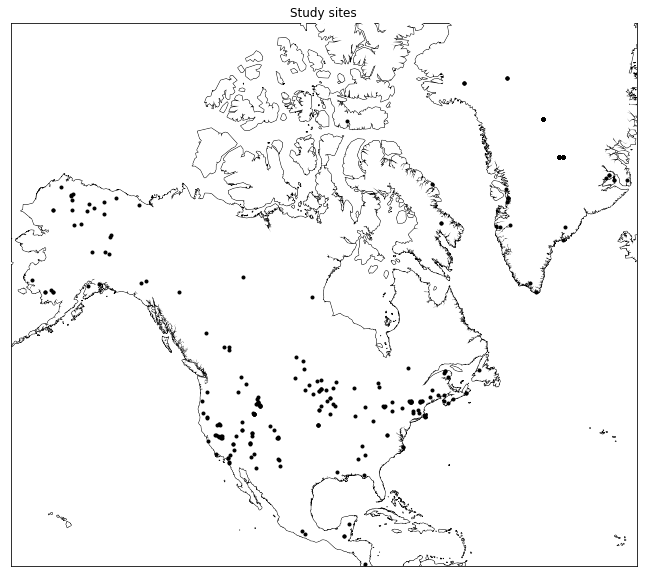

In [8]:
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='white',lake_color='white', zorder=5)

lons = working_df['longitude'].values
lats = working_df['latitude'].values
lon, lat = np.meshgrid(lons, lats)
x,y = m(lons, lats)
m.plot(x, y, 'o',color='k', markersize=3, zorder=10)
plt.title('Study sites')

In [9]:
val_counts = pd.DataFrame(working_df.type.value_counts())
val_counts.columns = ['Total studies']
val_counts

,Total studies
PLANT MACROFOSSILS,80
PALEOLIMNOLOGY,76
ICE CORES,75
FIRE HISTORY,34
SPELEOTHEMS,20
OTHER COLLECTIONS,5
INSECT,2
LAKE LEVELS,2
CLIMATE RECONSTRUCTIONS,1
POLLEN,1


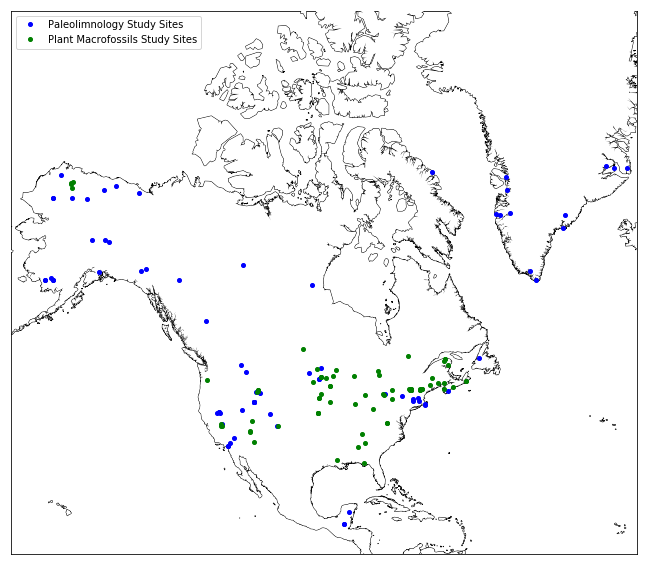

In [10]:
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='white',lake_color='white', zorder=5)

# Paleolimnology studies
lons = working_df['longitude'][working_df.type == 'PALEOLIMNOLOGY'].values
lats = working_df['latitude'][working_df.type == 'PALEOLIMNOLOGY'].values
lon, lat = np.meshgrid(lons, lats)
x,y = m(lons, lats)

m.plot(x, y, 'o', color='blue', markersize=4, zorder=10)

# Plant Macrofossils studies
lons = working_df['longitude'][working_df.type == 'PLANT MACROFOSSILS'].values
lats = working_df['latitude'][working_df.type == 'PLANT MACROFOSSILS'].values
lon, lat = np.meshgrid(lons, lats)
x,y = m(lons, lats)

m.plot(x, y, 'o', color='green', markersize=4, zorder=10)


plt.legend(['Paleolimnology Study Sites','Plant Macrofossils Study Sites'])

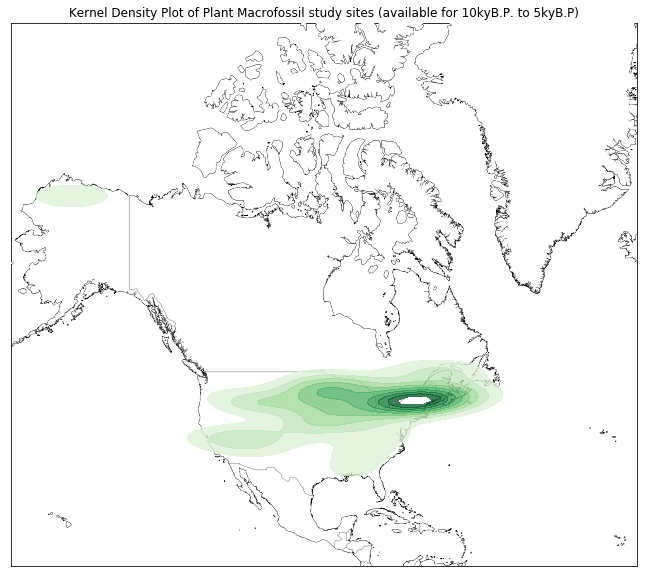

In [11]:
m.drawcoastlines(linewidth=0.75, zorder=2)
m.drawcountries(linewidth=0.25, zorder=6)

m.fillcontinents(color='white',lake_color='white', zorder=4)

lons = working_df['longitude'][working_df.type == 'PLANT MACROFOSSILS'].values
lats = working_df['latitude'][working_df.type == 'PLANT MACROFOSSILS'].values
lon, lat = np.meshgrid(lons, lats)
x,y = m(lons, lats)

# Gaussian kernel density plot
sns.kdeplot(x,y, cmap="Greens", shade=True, shade_lowest=False, alpha=.75, zorder=10)

plt.title('Kernel Density Plot of Plant Macrofossil study sites (available for 10kyB.P. to 5kyB.P)')